## Credit Card Fraud

#### Author: Yesahel Scicluna 

#### Source: Codecademy. Build a Machine Learning Model. Practice Project - Predict Credit Card Fraud

#### Concepts: Logistic Regression

#### Required Data Files: transactions_modified.csv

#### Task Description
Credit card fraud is one of the leading causes of identify theft around the world. In 2018 alone, over $24 billion were stolen through fraudulent credit card transactions. Financial institutions employ a wide variety of different techniques to prevent fraud, one of the most common being Logistic Regression.

In this project, you are a Data Scientist working for a credit card company. You have access to a dataset (based on a [synthetic financial dataset](https://www.kaggle.com/datasets/ealaxi/paysim1)), that represents a typical set of credit card transactions. Your task is to use Logistic Regression and create a predictive model to determine if a transaction is fraudulent or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Task 1
The file `transactions_modified.csv` contains data on 1000 simulated credit card transactions. Let’s begin by loading the data into a pandas DataFrame named `transactions`. Take a peek at the dataset using `.head()` and use `.info()` to examine how many rows there are and what datatypes they are. 

How many transactions are fraudulent? Print your answer.

In [2]:
transactions = pd.read_csv(r'C:\Users\yesah\Desktop\transactions_modified.csv')
transactions.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0
5,350,PAYMENT,16013.85,C2093859850,72766.00,56752.15,M1803659246,0.00,0.00,0
6,306,CASH_OUT,277310.34,C1480259234,0.00,0.00,C410033330,13379400.65,13656710.99,0
7,332,CASH_OUT,184157.68,C399464792,188588.19,4430.51,C295235726,358753.74,542911.42,0
8,330,CASH_IN,136804.02,C304503510,20781.00,157585.02,C1682763714,707549.54,570745.52,0
9,259,CASH_IN,60609.99,C2089244493,2907876.74,2968486.73,C277506714,823473.00,762863.01,0


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrg   1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 78.3+ KB


In [4]:
fraud_count = transactions[transactions.isFraud == 1].shape[0]
print('fraudulent transactions:', fraud_count)

fraudulent transactions: 282


#### Task 2
Looking at the dataset, combined with our knowledge of credit card transactions in general, we can see that there are a few interesting columns to look at. We know that the `amount` of a given transaction is going to be important. Calculate summary statistics for this column. What does the distribution look like?

In [5]:
transactions.amount.describe()

count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64

array([[<Axes: title={'center': 'amount'}>]], dtype=object)

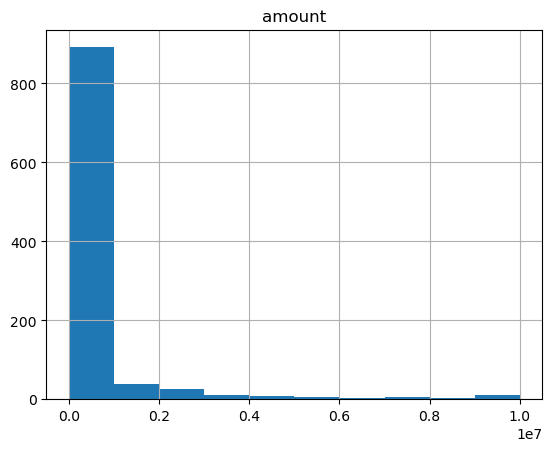

In [6]:
transactions.hist('amount')

#### Task 3
We have a lot of information about the `type` of transaction we are looking at. Let’s create a new column called `isPayment` that assigns a `1` when `type` is “PAYMENT” or “DEBIT”, and a `0` otherwise.

In [7]:
transactions['isPayment'] = transactions.type.apply(lambda x: 1 if x in ('PAYMENT', 'DEBIT') else 0)
transactions.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0
5,350,PAYMENT,16013.85,C2093859850,72766.00,56752.15,M1803659246,0.00,0.00,0,1
6,306,CASH_OUT,277310.34,C1480259234,0.00,0.00,C410033330,13379400.65,13656710.99,0,0
7,332,CASH_OUT,184157.68,C399464792,188588.19,4430.51,C295235726,358753.74,542911.42,0,0
8,330,CASH_IN,136804.02,C304503510,20781.00,157585.02,C1682763714,707549.54,570745.52,0,0
9,259,CASH_IN,60609.99,C2089244493,2907876.74,2968486.73,C277506714,823473.00,762863.01,0,0


#### Task 4
Similarly, create a column called `isMovement`, which will capture if money moved out of the origin account. This column will have a value of ``1 when type is either `“CASH_OUT”` or `“TRANSFER”`, and a `0` otherwise.

In [8]:
transactions['isMovement'] = transactions.type.apply(lambda x: 1 if x in ('CASH_OUT', 'TRANSFER') else 0)
transactions.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0
5,350,PAYMENT,16013.85,C2093859850,72766.00,56752.15,M1803659246,0.00,0.00,0,1,0
6,306,CASH_OUT,277310.34,C1480259234,0.00,0.00,C410033330,13379400.65,13656710.99,0,0,1
7,332,CASH_OUT,184157.68,C399464792,188588.19,4430.51,C295235726,358753.74,542911.42,0,0,1
8,330,CASH_IN,136804.02,C304503510,20781.00,157585.02,C1682763714,707549.54,570745.52,0,0,0
9,259,CASH_IN,60609.99,C2089244493,2907876.74,2968486.73,C277506714,823473.00,762863.01,0,0,0


#### Task 5
With financial fraud, another key factor to investigate would be the difference in value between the origin and destination account. Our theory, in this case, being that destination accounts with a significantly different value could be suspect of fraud. Let’s create a column called `accountDiff` with the absolute difference of the `oldbalanceOrg` and `oldbalanceDest` columns.

In [9]:
transactions['accountDiff'] = transactions.oldbalanceDest - transactions.oldbalanceOrg 
transactions.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,-818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,-6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,-5542581.85
5,350,PAYMENT,16013.85,C2093859850,72766.00,56752.15,M1803659246,0.00,0.00,0,1,0,-72766.00
6,306,CASH_OUT,277310.34,C1480259234,0.00,0.00,C410033330,13379400.65,13656710.99,0,0,1,13379400.65
7,332,CASH_OUT,184157.68,C399464792,188588.19,4430.51,C295235726,358753.74,542911.42,0,0,1,170165.55
8,330,CASH_IN,136804.02,C304503510,20781.00,157585.02,C1682763714,707549.54,570745.52,0,0,0,686768.54
9,259,CASH_IN,60609.99,C2089244493,2907876.74,2968486.73,C277506714,823473.00,762863.01,0,0,0,-2084403.74


#### Task 6
Before we can start training our model, we need to define our features and label columns. Our label column in this dataset is the `isFraud` field. Create a variable called `features` which will be an array consisting of the following fields:
- `amount`
- `isPayment`
- `isMovement`
- `accountDiff`

Create a variable called `label` with the column `isFraud`.

In [10]:
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']].to_numpy()
features

array([[ 6.29270800e+04,  0.00000000e+00,  1.00000000e+00,
         6.49420670e+05],
       [ 3.28515700e+04,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.13175038e+06,  0.00000000e+00,  1.00000000e+00,
        -8.18679850e+05],
       ...,
       [ 6.22235320e+05,  0.00000000e+00,  1.00000000e+00,
         2.75573364e+06],
       [ 1.19604130e+05,  0.00000000e+00,  1.00000000e+00,
         2.24271092e+07],
       [ 1.52331260e+05,  0.00000000e+00,  1.00000000e+00,
        -1.52331260e+05]])

In [11]:
label = np.array(transactions['isFraud'])
label

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

#### Task 7
Split the data into training and test sets using `sklearn`'s `train_test_split()` method. We’ll use the training set to train the model and the test set to evaluate the model. Use a `test_size` value of `0.3`.

In [12]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.3)

#### Task 8
Since `sklearn`'s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a `StandardScaler` object, `.fit_transform()` it on the training features, and `.transform()` the test features.

In [13]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

#### Task 9
Create a `LogisticRegression` model with `sklearn` and `.fit()` it on the training data with the default threshold of 0.5.

In [14]:
model = LogisticRegression()
model.fit(features_train, label_train)

LogisticRegression()

#### Task 10
Run the model’s `.score()` method on the training data and print the training score.

Scoring the model on the training data will process the training data through the trained model and will predict which transactions are fraudulent. The score returned is the percentage of correct classifications, or the accuracy.

In [15]:
model.score(features_train, label_train)

0.8514285714285714

#### Task 11
Similarly, run the model’s `.score()` method on the test data and print the test score.

Scoring the model on the test data will process the test data through the trained model and will predict which transactions are fraudulent. The score returned is the percentage of correct classifications, or the accuracy, and will be an indicator for the success of your model.

How did your model perform?

In [16]:
model.score(features_test, label_test)

0.84

#### Task 12
Print the coefficients for our model to see how important each feature column was for prediction. Which feature was most important? Least important?

In [17]:
model.coef_

array([[ 1.72367217, -0.20901698,  3.0954885 , -1.34361034]])

#### Task 13
Let’s use our model to process more transactions that have gone through our systems. Below are three numpy arrays with information on new sample transactions:

`transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])` <br>
`transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])` <br>
`transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])`

Create a fourth array, `your_transaction`, and add any transaction information you’d like.

In [18]:
your_transaction = np.array([3341.12, 0.0, 0.0, 133322.5])

#### Task 14
Combine the new transactions and `your_transaction` into a single numpy array called `sample_transactions`.

In [19]:
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

sample_transactions = np.stack((transaction1, transaction2, transaction3, your_transaction))
sample_transactions

array([[1.2345678e+05, 0.0000000e+00, 1.0000000e+00, 5.4670100e+04],
       [9.8765430e+04, 1.0000000e+00, 0.0000000e+00, 8.5247500e+03],
       [5.4367831e+05, 1.0000000e+00, 0.0000000e+00, 5.1002550e+05],
       [3.3411200e+03, 0.0000000e+00, 0.0000000e+00, 1.3332250e+05]])

#### Task 15
Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. Using the `StandardScaler` object created earlier, apply its `.transform()` method to `sample_transactions` and save the result to `sample_transactions`.

In [20]:
sample_transactions = scaler.transform(sample_transactions)
sample_transactions

array([[-0.29547137, -0.52001675,  0.81649658,  0.01312266],
       [-0.31359532,  1.92301497, -1.22474487,  0.00264166],
       [ 0.01297962,  1.92301497, -1.22474487,  0.11654755],
       [-0.38363867, -0.52001675, -1.22474487,  0.03098698]])

#### Task 16
Which transactions are fraudulent? Use your model’s `.predict()` method on `sample_transactions` and print the result to find out.

Want to see the probabilities that led to these predictions? Call your model’s `.predict_proba()` method on `sample_transactions` and print the result.

In [21]:
model.predict(sample_transactions)

array([0, 0, 0, 0], dtype=int64)

In [22]:
model.predict_proba(sample_transactions)[:,1]

array([0.37190366, 0.00062916, 0.0009476 , 0.00089421])